# Welcome to you notebook

In [120]:
# hello world
print("hello notebook")

hello notebook


In [121]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

In [122]:
# 加载糖尿病数据集
# 返回的是一个包含两个元素的元组 (X, y)，其中：
# X是糖尿病数据集的特征矩阵（样本数据）。
# y 是糖尿病数据集的目标标签（样本的目标值）。

X,y = datasets.load_diabetes(return_X_y=True)

# 通过 X.shape 打印出特征矩阵的形状，它返回 (442, 10)，表示数据集有 442 个样本，每个样本有 10 个特征
print(X.shape)

# 打印出第一个样本的特征值。
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [123]:
# 通过使用 numpy 的 newaxis 函数将数据集的一部分排列到一个新数组中。
# 我们将使用线性回归根据它确定的模式在此数据中的值之间生成一条线。
X = X[:, np.newaxis, 9]

In [124]:
# 将数据 (X) 和目标 (y) 拆分为测试集和训练集。
# Scikit-learn 有一个简单的方法来做到这一点；你可以在给定点拆分测试数据
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

In [125]:
# 加载线性回归模型并使用 model.fit() 使用 X 和 y 训练集对其进行训练：
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [126]:
# 使用函数 predict()，使用测试数据创建预测。这将用于绘制数据组之间的线
y_pred = model.predict(X_test)

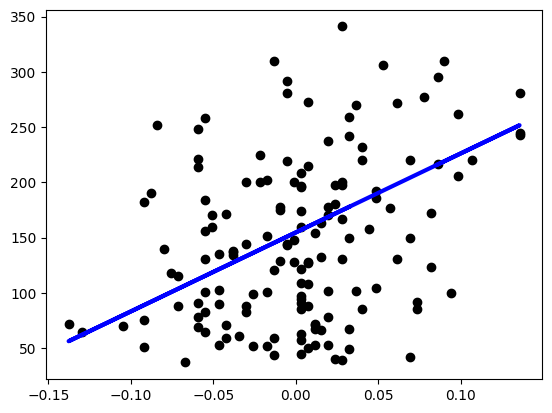

In [127]:
# 创建所有 X 和 y 测试数据的散点图，并使用预测在模型的数据分组之间最合适的位置画一条线。
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:, np.newaxis, 2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

详细的解释一下，并回答以下问题：
1、这里发生了什么。一条直线穿过许多小数据点，但它到底在做什么？
2、你能看到你应该如何使用这条线来预测一个新的、未见过的数据点对应的 y 轴值吗？尝试用语言描述该模型的实际用途。

这个代码使用线性回归模型来预测糖尿病患者的某些特征与目标变量（可能是一些与疾病相关的指标，如病情进展或健康水平）之间的关系。具体来说，它是用来拟合一条直线来描述输入特征（在这个例子中是某个特定的糖尿病特征）和目标变量之间的关系。

### 1. 发生了什么？
- **加载数据**：`datasets.load_diabetes(return_X_y=True)`从糖尿病数据集中加载特征（X）和目标变量（y）。这个数据集包含患者的10个特征（如年龄、性别、体重等）和一个目标变量（如疾病进展）。
- **选择特定的特征**：`X = X[:, np.newaxis, 2]`从所有特征中选取第3列（索引为2），并将其转换为二维数组，以便能够进行线性回归。这样做是为了简化问题，只用一个特征来进行回归分析。
- **分割数据**：`train_test_split`函数将数据分为训练集和测试集，训练集占67%，测试集占33%。
- **线性回归模型的训练**：`model.fit(X_train, y_train)`使用训练集拟合一个线性回归模型，找到一条直线，尽可能最好地描述训练数据中的特征和目标变量之间的关系。
- **模型预测**：`model.predict(X_test)`使用训练好的模型对测试集的特征进行预测，生成一个对应的预测值。
- **数据可视化**：代码通过 `plt.scatter` 在图上绘制了测试集的实际数据点（黑色），并通过 `plt.plot` 绘制了预测值组成的直线（蓝色），展示了模型的拟合效果。

### 2. 直线的实际作用
在这个线性回归模型中，拟合的直线表示特征（在这个例子中是第3个特征值）与目标变量之间的线性关系。直线的方程可以表示为：

\[ y = wX + b \]

其中，`w` 是直线的斜率，`b` 是截距。每当我们有一个新的输入特征值 `X` 时，我们就可以代入这个线性方程来预测对应的 `y` 值（目标变量）。

**如何使用这条线来预测新数据点？**
假设我们获得了一个新的病人数据，新的数据点中第3个特征的值是 `X_new`，你可以将它代入上面直线方程来预测该病人的目标值 `y_new`。

### 该模型的实际用途
- **描述关系**：这个模型主要用于描述输入特征（如某些病理特征）和目标变量（如糖尿病的严重程度）之间的关系。它揭示了在训练数据中的总体趋势，即特征值增大或减少时目标值的变化趋势。
- **预测**：该模型可以用于预测。给定新的患者数据，只要我们知道第3个特征的值，我们就可以通过模型预测该患者的疾病相关指标或进展情况。

总结来说，线性回归模型通过找出一个特征与目标变量之间的线性关系，可以帮助我们基于新数据进行预测，从而在现实世界中对未见过的患者进行疾病评估或预测。